In [2]:
from tmg_hmc import TMGSampler 
import matplotlib.pyplot as plt
import numpy as np

# Star Constraint

[[ 1.64316767 -0.54772256]
 [-0.54772256  1.64316767]]
[[ 1.64316767 -0.54772256]
 [-0.54772256  1.64316767]]


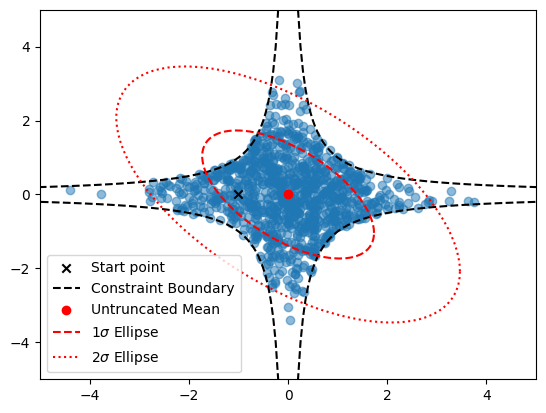

In [5]:
mu = np.array([0.0, 0.0]).reshape(-1, 1)
sigma = 3*np.array([[1.0, -0.6], [-0.6, 1.0]])
sampler = TMGSampler(mu, sigma, gpu=False)

# Define (xy + 1) (-xy + 1) >= 0  constraint
parameters = [
    {'A': np.array([[0, 0.5],[0.5, 0]]), 'c': 1.0},
    {'A': np.array([[0, -0.5],[-0.5, 0]]), 'c': 1.0},
]
sampler.add_product_constraint(parameters=parameters)

x0 = np.array([-1,0]).reshape(-1, 1)
samples = sampler.sample(x0, 1000, 100)
theta = np.linspace(0, 2 * np.pi, 100)
scale = np.linalg.cholesky(sigma)
ellipse = np.array([scale @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) + mu.reshape(-1, 1) for theta_i in theta])
ellipse2 = np.array([2*scale @ np.array([np.cos(theta_i), np.sin(theta_i)]).reshape(-1, 1) + mu.reshape(-1, 1) for theta_i in theta])

fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
ax.scatter(x0[0], x0[1], color='k', marker='x', label='Start point')
# Plot constraint boundary
x = np.linspace(0,5,101)[1:]
ax.plot(x, 1./x, color='black', linestyle='--', label='Constraint Boundary')
ax.plot(x, -1./x, color='black', linestyle='--')
ax.plot(-x, 1./x, color='black', linestyle='--')
ax.plot(-x, -1./x, color='black', linestyle='--')
# Plot true mean and 1 sigma ellipse
ax.scatter(mu[0], mu[1], color='red', label='Untruncated Mean')
ax.plot(ellipse[:, 0], ellipse[:, 1], color='red', linestyle='--', label=r'1$\sigma$ Ellipse')
ax.plot(ellipse2[:, 0], ellipse2[:, 1], color='red', linestyle=':', label=r'2$\sigma$ Ellipse')
ax.legend()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.show()